In [1]:
![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

SyntaxError: invalid syntax (<ipython-input-1-7f915a18b9a7>, line 4)

### **Проект 3. О вкусной и здоровой пище**

#### **Опиание проекта**

Представьте, что вы работаете DS в компании TripAdvisor. Одна из проблем компании — это нечестные рестораны, которые накручивают себе рейтинг. Одним из способов нахождения таких ресторанов является построение модели, которая предсказывает рейтинг ресторана. Если предсказания модели сильно отличаются от фактического результата, то, возможно, ресторан играет нечестно, и его стоит проверить.

#### **Основные цели и задачи проекта:**

* разобраться с подробным описанием того, как будет организовано изучение модуля;

* зарегистрироваться в соревновании на kaggle;

* проанализировать baseline к соревнованию;

* следуя подсказкам в модуле, обработать оставшиеся признаки и подготовить собственное решение;

* победить в соревновании


### **Импортируем данные:**

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [3]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [4]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# **DATA**

In [5]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [7]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [9]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [10]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [11]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [12]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

### **Посмотрим пропуски в данных**

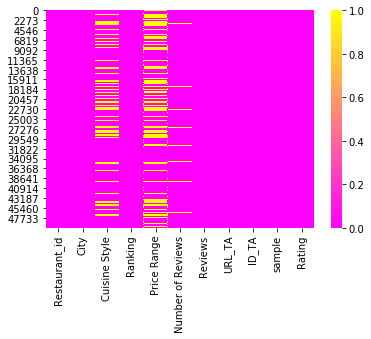

In [14]:

sns.heatmap(data.isnull(), cmap='spring')

#### **Основные пропуски:**
* Cuisine Style
* Price Range

### **Обработка поля Cuisine Style:**

In [15]:
#Замена Nan:
data['Cuisine Style'].fillna('Cuisine_Style_Nan', inplace=True)

#Парсим:
cuisine_style_list = []
cuisine_style_list_all = []
cuisine_style_list_data = data['Cuisine Style'].tolist()
for cuisine_style in cuisine_style_list_data: 
    cuisine_style_list = cuisine_style.replace("\'","").replace("[","").replace("]",'').split(", ")
    for el in cuisine_style_list:
        cuisine_style_list_all.append(el)
        
#Отбираем топ 20
cuisine_style_df = pd.DataFrame(cuisine_style_list_all,columns=['cuisine_style'])
cuisine_style_list_top = pd.DataFrame(cuisine_style_df.cuisine_style.value_counts()).reset_index().sort_values(by = 'cuisine_style', ascending=False).head(20)['index'].tolist()

#Имитируем get_dummies, создаем столбцы с названием Стилей кухон:
for cuisine_style in cuisine_style_list_top:
    data[cuisine_style] = data['Cuisine Style'].apply(lambda x: 1 if cuisine_style in x else 0)

#Заполняем столбец прочие
def other_style(x):
    cuisine_style_list = x.replace("\'","").replace("[","").replace("]",'').split(", ")
    for el in cuisine_style_list:
        if el not in cuisine_style_list_top:
            return 1
    return 0
    
data['Other Style'] = data['Cuisine Style'].apply(other_style)

#=================================================================================================================    
#Очень странно что цикл в цикле работате быстрее чем стандартные функции!!!!!  например объединение Pandas     
    
#Формируем уникальное количесво используя множество: Не подходит, но работает быстро!
#Cuisine_Style_Set = set()
#for Cuisine_Style in data['Cuisine Style'].tolist():
    #Cuisine_Style_Set = Cuisine_Style_Set.union(set(Cuisine_Style.replace("\'","").replace("[","").replace("]",'').split(", ")))
    
#Парсим: кортеж - работает медленно
#cuisine_style_tup = ()
#cuisine_style_list_data = data['Cuisine Style'].tolist()
#for cuisine_style in cuisine_style_list_data: 
    #cuisine_style_tup = cuisine_style_tup + tuple(cuisine_style.replace("\'","").replace("[","").replace("]",'').split(", "))    

#Парсим: список - работает медленно
#cuisine_style_list = []
#cuisine_style_list_data = data['Cuisine Style'].tolist()
#for cuisine_style in cuisine_style_list_data: 
    #cuisine_style_list = cuisine_style_list + cuisine_style.replace("\'","").replace("[","").replace("]",'').split(", ")
    
#Парсим: DataFrame - работает медленно
#cuisine_style_df = pd.DataFrame(columns=['cuisine_style'])
#for cuisine_style in cuisine_style_list:
    #l = cuisine_style.replace("\'","").replace("[","").replace("]",'').split(", ")
    #cuisine_style_df = pd.DataFrame(l, columns=['cuisine_style']).append(cuisine_style_df, sort=False,ignore_index=False)
    

### **Обработка поля Reviews:**

In [16]:
#Замена Nan:
data['Reviews'].fillna("[[], []]", inplace=True)


# сделаем два списка: положительные и отрицательные слова
good_words = ['amazing','fantastic','perfect','wonderful',
               'gusto','nya','bellisimo','dequate','pleasantly','wunderfull',
               'pleasant','awesome','yummy','fabulous','cool',
               'delucious','excellient','picturesque','👍','good','great',
               'best','excellent','nice','delicious','lovely','tasty',
               'fine','brilliant','enjoyable','good!','outstanding','delicious!',
               'charming','affordable','delightful','comfortable','+','gorgeous','👏',
              'рекомендую','famously','amazinggggg',':)','))','💓', 'recommendable',
              'superbo','graet','guter','⭐️','👌','super','wow']

bad_words = ['foo ','bad ','poor','stop ','worst','disappointing',
              '😞','weak','only?','grubby','awseome','wash','ameri',
              'horrible','mediocre','unfriendly','worse','dirty',
              'weakest','filthy','disasterous','becareful','miserable',
              'terrible','overpriced','rude','disappointed',
              'disappointment','fo ','waste','satisfying', '((', ':(','warning','poor']

#Создаемм 2 столбца с признаками на основании отзывов хороший или плохой рестаран
def count_words(string, words):
    for word in words:    
        if word in string.lower():
            return 1
    return 0



data['good_words'] = data['Reviews'].apply(lambda x: count_words(x, good_words))
data['bad_words'] = data['Reviews'].apply(lambda x: count_words(x, bad_words))

In [17]:
data[['good_words','bad_words','Reviews']].sample(10)

,good_words,bad_words,Reviews
39220,1,0,"[['Team Christmas Meal', 'Good but a bit expen..."
4830,1,0,"[['Pleasantly Surprised Every Time', 'Amazing ..."
38612,1,0,[['Heard good things..and was NOT disappointe....
18828,0,0,"[['Authentic Italian Grotto', 'Convenient Ital..."
1183,1,0,"[['Great Show and Venue', 'Fabulous Evening gr..."
38723,1,0,"[['Retail and rolls ...what a combination...',..."
23853,1,0,"[['Nice early dinner', 'Tasty food'], ['08/29/..."
42975,1,0,[['Authentic modern Italian. Great location n....
9966,1,0,"[['Traditional austrian cuisine', 'Nice restau..."
46867,0,0,"[['Slight disappoinment', 'Basic, but inexpens..."


In [18]:
data.loc[6840]['Reviews']

"[['Best kebab', 'Scrumptuous place to eat casual or if fami...'], ['12/30/2017', '08/27/2017']]"

### **Обработка поля Price Range:**

По описанию 'Price Range' это - Цены в ресторане.
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3

In [19]:
display(data['Price Range'].unique())

display(data['Price Range'].value_counts())

def replace_price_range(string):
    
    if pd.isnull(string):
        return 0
    elif string == '$$$$':
        
        return 3
    elif string == '$$ - $$$':
        return 2
    elif string == '$':
        return 1
data['Price Range'] = data['Price Range'].apply(replace_price_range)

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [20]:
data['Price Range'].sample(10)

15152    2
40623    2
572      0
22152    1
21388    2
24984    2
30898    0
2676     0
37810    0
10207    2
Name: Price Range, dtype: int64

In [21]:
data.head(10)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Cafe,Fast Food,British,International,Seafood,Japanese,Central European,Other Style,good_words,bad_words
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,0,0,0,0,0,0,0,0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0,0,0,0,0,1,1,0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,0,0,0,0,0,0,1,0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,0,0,1,0,0,0,1,0
5,id_5,Paris,"['French', 'Cafe', 'Fast Food']",5093.0,1,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,...,1,1,0,0,0,0,0,0,1,0
6,id_6,Lisbon,"['European', 'Portuguese']",3704.0,1,2.0,"[[], []]",/Restaurant_Review-g189158-d8758873-Reviews-Li...,d8758873,0,...,0,0,0,0,0,0,0,1,0,0
7,id_7,Budapest,Cuisine_Style_Nan,2330.0,0,NaN,"[[], []]",/Restaurant_Review-g274887-d8286886-Reviews-Be...,d8286886,0,...,0,0,0,0,0,0,0,0,0,0
8,id_8,Helsinki,"['European', 'Scandinavian']",771.0,0,2.0,"[['Big group supper', 'Good food but very slow...",/Restaurant_Review-g189934-d12947542-Reviews-B...,d12947542,0,...,0,0,0,0,0,0,0,1,1,1
9,id_9,Stockholm,['Italian'],605.0,0,13.0,"[['Good food', 'Good pizza'], ['12/02/2017', '...",/Restaurant_Review-g189852-d12716384-Reviews-I...,d12716384,0,...,0,0,0,0,0,0,0,0,1,0


### **Ranking**

In [22]:
#Расчитываем средний ранк по городу 
df_r = data.groupby(['City'])['Ranking'].mean().reset_index()
df_r.columns = ['City','Ranking_mean']
#Добавляем средний ранк в датасет
data = pd.merge(data,df_r,left_on='City',right_on='City', how='inner')

In [23]:
#выводим коэффициент Ranking
data['Ranking_corr'] = data['Ranking']/data['Ranking_mean']

In [24]:
data.City.value_counts()

London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: City, dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 36 columns):
Restaurant_id          50000 non-null object
City                   50000 non-null object
Cuisine Style          50000 non-null object
Ranking                50000 non-null float64
Price Range            50000 non-null int64
Number of Reviews      46800 non-null float64
Reviews                50000 non-null object
URL_TA                 50000 non-null object
ID_TA                  50000 non-null object
sample                 50000 non-null int64
Rating                 50000 non-null float64
Vegetarian Friendly    50000 non-null int64
European               50000 non-null int64
Cuisine_Style_Nan      50000 non-null int64
Mediterranean          50000 non-null int64
Italian                50000 non-null int64
Vegan Options          50000 non-null int64
Gluten Free Options    50000 non-null int64
Bar                    50000 non-null int64
French                 50000 non-null int64

In [26]:
data[(data['City'].isin (['London','Paris','Brussels']))][['City','Ranking_mean','Ranking','Ranking_corr']].sample(10)

,City,Ranking_mean,Ranking,Ranking_corr
34830,Brussels,1541.901826,2763.0,1.791943
10438,London,8169.707354,595.0,0.072830
7630,London,8169.707354,13813.0,1.690758
2811,Paris,6938.557138,1869.0,0.269364
2971,Paris,6938.557138,8387.0,1.208753
5267,Paris,6938.557138,2032.0,0.292856
4898,Paris,6938.557138,7288.0,1.050362
5260,Paris,6938.557138,9257.0,1.334139
13381,London,8169.707354,12238.0,1.497973
10617,London,8169.707354,12335.0,1.509846


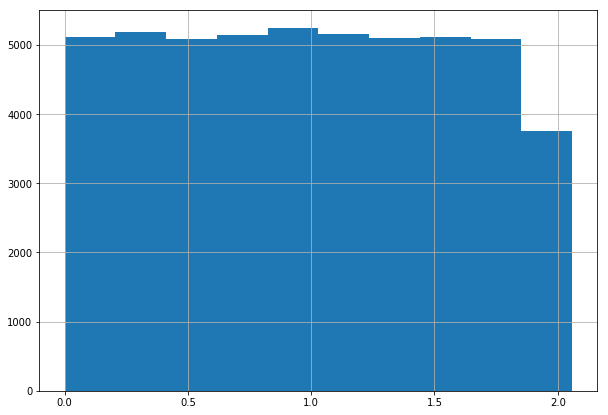

In [27]:
plt.rcParams['figure.figsize'] = (10,7)
data['Ranking_corr'].hist()


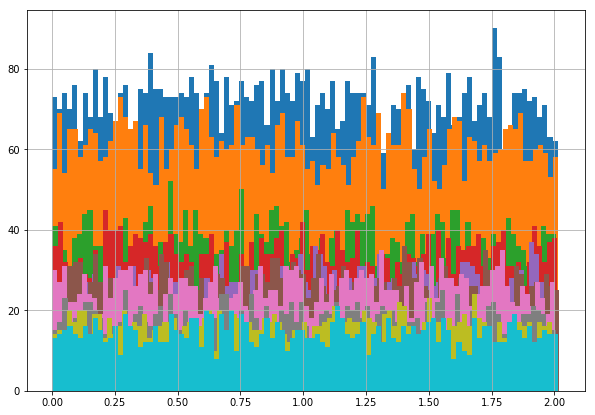

In [28]:
for x in (data['City'].value_counts())[0:10].index:
    data['Ranking_corr'][data['City'] == x].hist(bins=100)
plt.show()

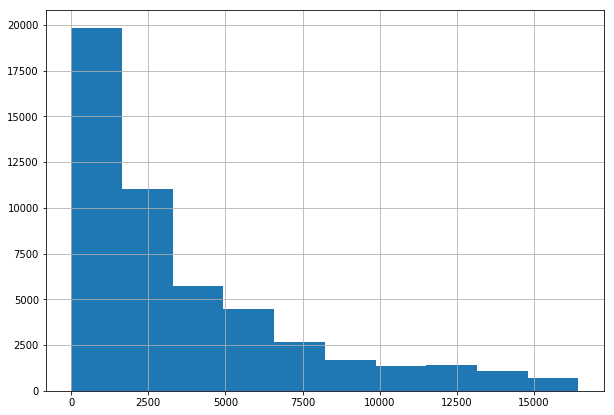

In [29]:
plt.rcParams['figure.figsize'] = (10,7)
data['Ranking'].hist()

### Поскольку распределение Ranking по городам равномерное то в модели лучше использовать Ranking_corr

In [30]:
data.drop(['Ranking','Ranking_mean'], axis=1, inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 34 columns):
Restaurant_id          50000 non-null object
City                   50000 non-null object
Cuisine Style          50000 non-null object
Price Range            50000 non-null int64
Number of Reviews      46800 non-null float64
Reviews                50000 non-null object
URL_TA                 50000 non-null object
ID_TA                  50000 non-null object
sample                 50000 non-null int64
Rating                 50000 non-null float64
Vegetarian Friendly    50000 non-null int64
European               50000 non-null int64
Cuisine_Style_Nan      50000 non-null int64
Mediterranean          50000 non-null int64
Italian                50000 non-null int64
Vegan Options          50000 non-null int64
Gluten Free Options    50000 non-null int64
Bar                    50000 non-null int64
French                 50000 non-null int64
Asian                  50000 non-null int64
P

### **Обработка поля City:**

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [32]:
data.City.value_counts()

London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: City, dtype: int64

In [33]:
#City кодируем с помощью метода One-Hot Encoding
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 65 columns):
Restaurant_id          50000 non-null object
Cuisine Style          50000 non-null object
Price Range            50000 non-null int64
Number of Reviews      46800 non-null float64
Reviews                50000 non-null object
URL_TA                 50000 non-null object
ID_TA                  50000 non-null object
sample                 50000 non-null int64
Rating                 50000 non-null float64
Vegetarian Friendly    50000 non-null int64
European               50000 non-null int64
Cuisine_Style_Nan      50000 non-null int64
Mediterranean          50000 non-null int64
Italian                50000 non-null int64
Vegan Options          50000 non-null int64
Gluten Free Options    50000 non-null int64
Bar                    50000 non-null int64
French                 50000 non-null int64
Asian                  50000 non-null int64
Pizza                  50000 non-null int64
Sp

In [35]:
data.head(3)

,Restaurant_id,Cuisine Style,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Vegetarian Friendly,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
1,id_5,"['French', 'Cafe', 'Fast Food']",1,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
2,id_15,['French'],1,39.0,"[['Very nice food and staff', 'Lovely service ...",/Restaurant_Review-g187147-d7605609-Reviews-Le...,d7605609,0,0.0,0,...,0,0,1,0,0,0,0,0,0,0


### **Обработка поля Number of Reviews**

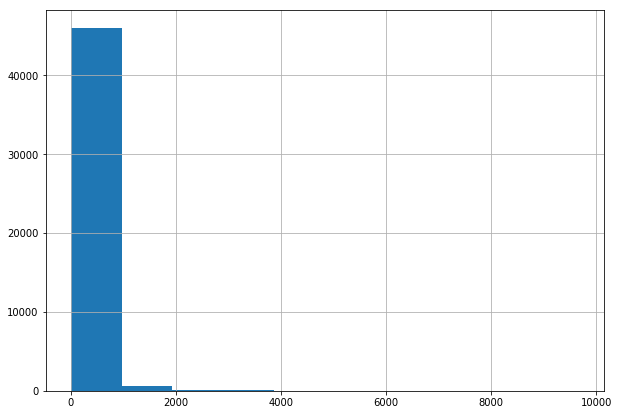

In [36]:
data['Number of Reviews'].hist()

In [37]:
data.head()
data['Number of Reviews'].min()
data['Number of Reviews'].max()

9660.0

In [38]:
#Полe числовое, достаточно обработать Nan
data['Number of Reviews'].fillna(0, inplace=True)


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 65 columns):
Restaurant_id          50000 non-null object
Cuisine Style          50000 non-null object
Price Range            50000 non-null int64
Number of Reviews      50000 non-null float64
Reviews                50000 non-null object
URL_TA                 50000 non-null object
ID_TA                  50000 non-null object
sample                 50000 non-null int64
Rating                 50000 non-null float64
Vegetarian Friendly    50000 non-null int64
European               50000 non-null int64
Cuisine_Style_Nan      50000 non-null int64
Mediterranean          50000 non-null int64
Italian                50000 non-null int64
Vegan Options          50000 non-null int64
Gluten Free Options    50000 non-null int64
Bar                    50000 non-null int64
French                 50000 non-null int64
Asian                  50000 non-null int64
Pizza                  50000 non-null int64
Sp

### Посмотрим распределение целевой переменной

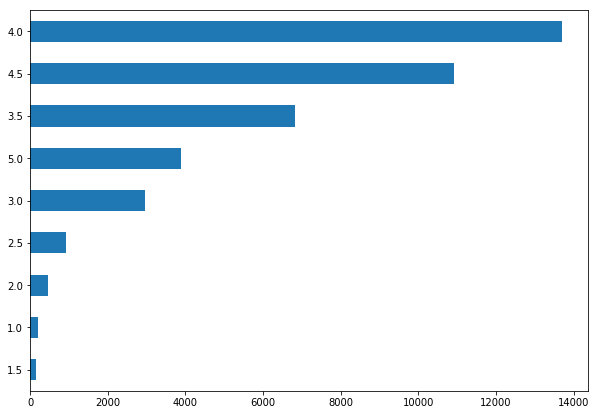

In [40]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

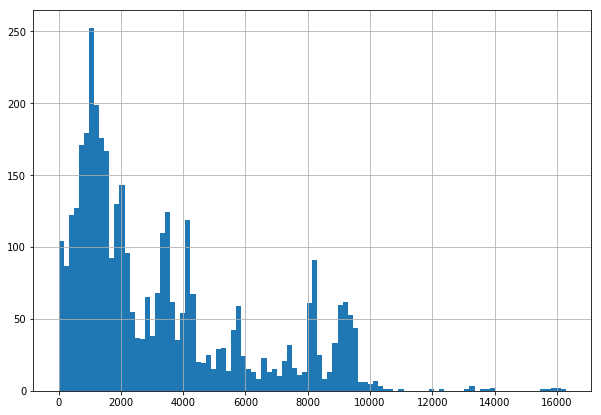

In [41]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

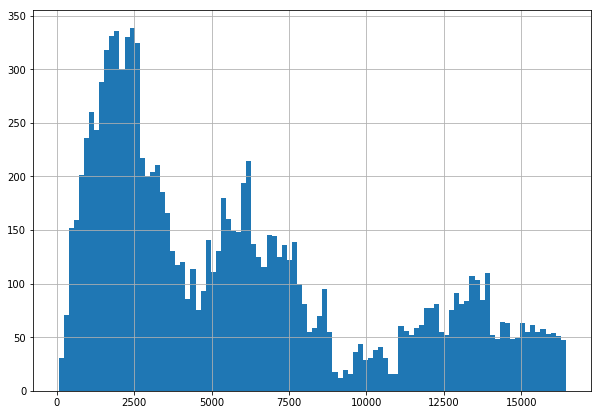

In [42]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

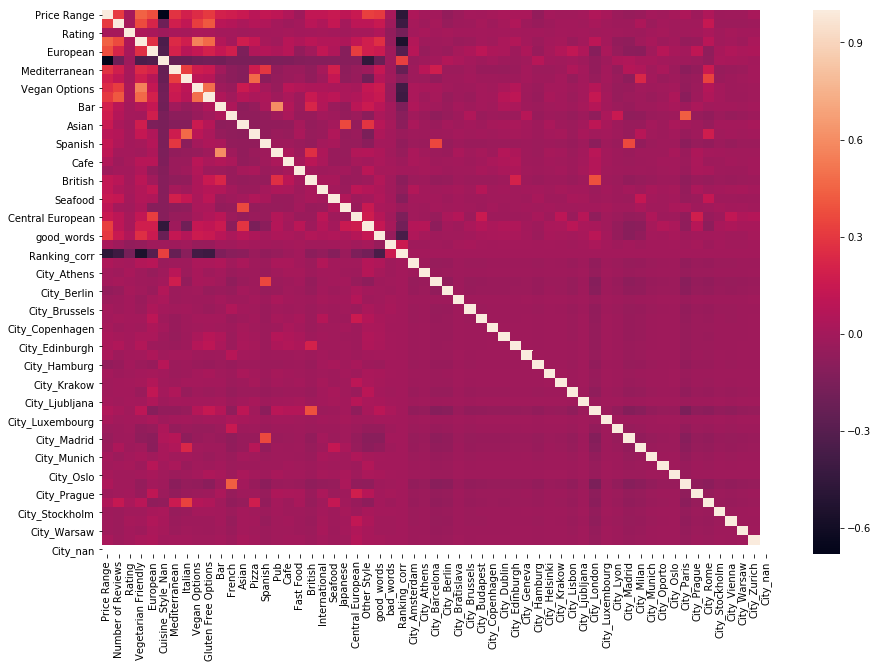

In [43]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

### **убираем признаки которые еще не успели обработать,** 
### **модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим**

In [44]:
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)

#### Запускаем и проверяем что получилось

In [45]:
data.sample(10)

,Price Range,Number of Reviews,sample,Rating,Vegetarian Friendly,European,Cuisine_Style_Nan,Mediterranean,Italian,Vegan Options,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
38287,2,176.0,1,4.0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
19096,1,497.0,0,0.0,1,0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
23488,1,50.0,1,4.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
29183,0,24.0,1,4.5,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14644,1,23.0,1,4.5,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
43976,1,32.0,1,3.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30187,2,11.0,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43255,0,14.0,1,4.5,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8110,0,2.0,0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16867,2,21.0,1,4.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 60 columns):
Price Range            50000 non-null int64
Number of Reviews      50000 non-null float64
sample                 50000 non-null int64
Rating                 50000 non-null float64
Vegetarian Friendly    50000 non-null int64
European               50000 non-null int64
Cuisine_Style_Nan      50000 non-null int64
Mediterranean          50000 non-null int64
Italian                50000 non-null int64
Vegan Options          50000 non-null int64
Gluten Free Options    50000 non-null int64
Bar                    50000 non-null int64
French                 50000 non-null int64
Asian                  50000 non-null int64
Pizza                  50000 non-null int64
Spanish                50000 non-null int64
Pub                    50000 non-null int64
Cafe                   50000 non-null int64
Fast Food              50000 non-null int64
British                50000 non-null int64
Interna

In [47]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [48]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [49]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 59), (40000, 59), (40000, 58), (32000, 58), (8000, 58))

# Model 
Сам ML

In [50]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [51]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [52]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [53]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20859687500000001


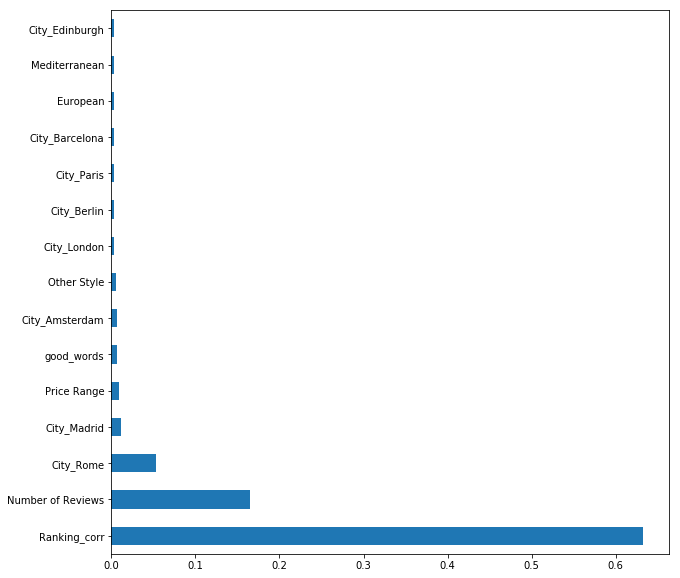

In [54]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh') 

# Submission
Если все устраевает - готовим Submission на кагл

In [55]:
test_data.sample(10)

,Price Range,Number of Reviews,Rating,Vegetarian Friendly,European,Cuisine_Style_Nan,Mediterranean,Italian,Vegan Options,Gluten Free Options,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
18809,1,54.0,0.0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
43514,2,78.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26296,1,15.0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
29591,2,19.0,0.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,1,470.0,0.0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
44652,1,128.0,0.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45353,2,113.0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14992,3,82.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19014,2,145.0,0.0,1,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
8357,1,684.0,0.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
test_data = test_data.drop(['Rating'], axis=1)

In [57]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [58]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [59]:
predict_submission

array([3.43 , 4.375, 3.125, ..., 3.95 , 4.075, 4.31 ])

In [60]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.430
1,id_1,4.375
2,id_2,3.125
3,id_3,4.880
4,id_4,4.550
5,id_5,3.705
6,id_6,3.870
7,id_7,2.930
8,id_8,3.245
9,id_9,3.805


# What's next?
Или что делать, чтоб улучшить результат: 
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
